In [11]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
home_dir='/nas/longleaf/home/kbhimani/'

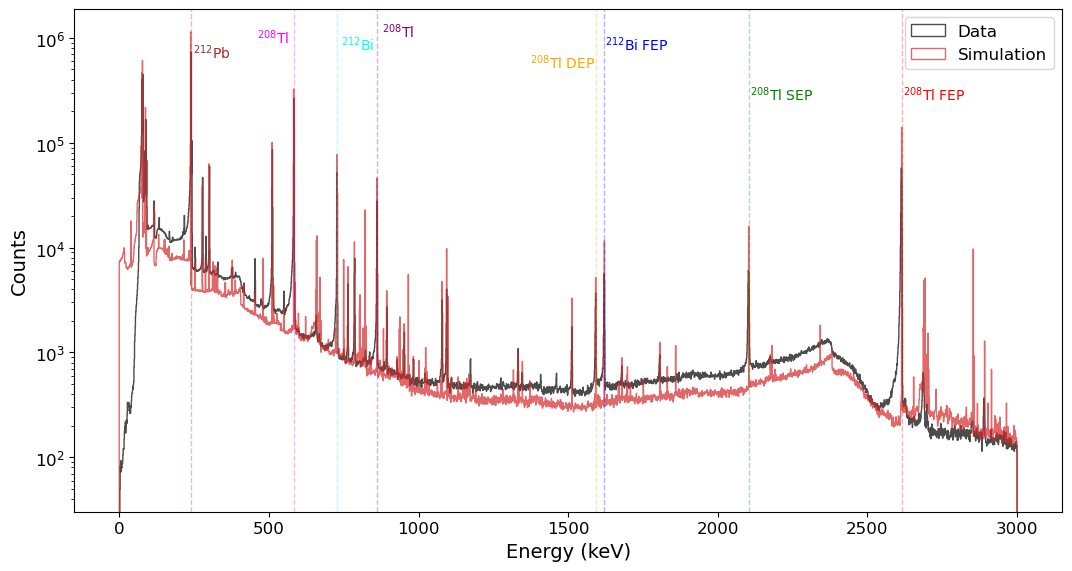

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Load energy spectra
eng_spec = np.load("plot_data/eng_spec.npy")
eng_spec_sim = np.load("/nas/longleaf/home/kbhimani/CPU-Net/paper/plot_data/eng_spec_sim.npy")

# Define peak energies, labels, colors, and position factors
peaks = [
    (2614.53, r'$^{208}$Tl FEP', 'red', 0.2, 110),   # (energy, label, color, vertical pos factor, horizontal offset)
    (2103.53, r'$^{208}$Tl SEP', 'green', 0.2, 110),
    (1620.5, r'$^{212}$Bi FEP', 'blue', 0.6, 110),
    (1592.53, r'$^{208}$Tl DEP', 'orange', 0.4, -110),
    (860.56, r'$^{208}$Tl', 'purple', 0.8, 70),
    (727.2, r'$^{212}$Bi', 'cyan', 0.6, 70),
    (583.2, r'$^{208}$Tl', 'magenta', 0.7, -70),
    (238.4, r'$^{212}$Pb', 'brown', 0.5,70)
]

# Plot both histograms
plt.figure(figsize=(11, 6))

bins = np.linspace(0, 3000, 3000)
# Data spectrum
hist_data, bins_data, _ = plt.hist(eng_spec, bins=bins, 
                                   histtype='step', color='k', alpha=0.7, label='Data')

# Simulated spectrum
hist_sim, bins_sim, _ = plt.hist(eng_spec_sim, bins=bins, 
                                 histtype='step', color='tab:red', alpha=0.7, label='Simulation')

# Add peak lines and labels
for energy, label, color, pos_factor, h_offset in peaks:
    plt.axvline(energy, color=color, alpha=0.3, linestyle='--', linewidth=1)
    plt.text(
        energy + h_offset, plt.ylim()[1] * pos_factor, label, color=color,
        verticalalignment='bottom', horizontalalignment='center', fontsize=10
    )

# Set log scale for y-axis
plt.yscale('log')

# Add labels and title
plt.xlabel('Energy (keV)',fontsize=14)
plt.ylabel('Counts',fontsize=14)
# plt.title('Energy Spectrum Comparison: Thorium Calibration vs. G4 Simulation')

plt.xticks(fontsize=12)  # Bigger tick labels
plt.yticks(fontsize=12)  # Bigger tick labels
plt.legend(fontsize=14)
# Add legend
plt.legend(loc='upper right', fontsize=12)

# Save and show the figure
plt.tight_layout()
plt.savefig("figs/energy_spectrum_comparison.pdf",dpi=300)
plt.show()


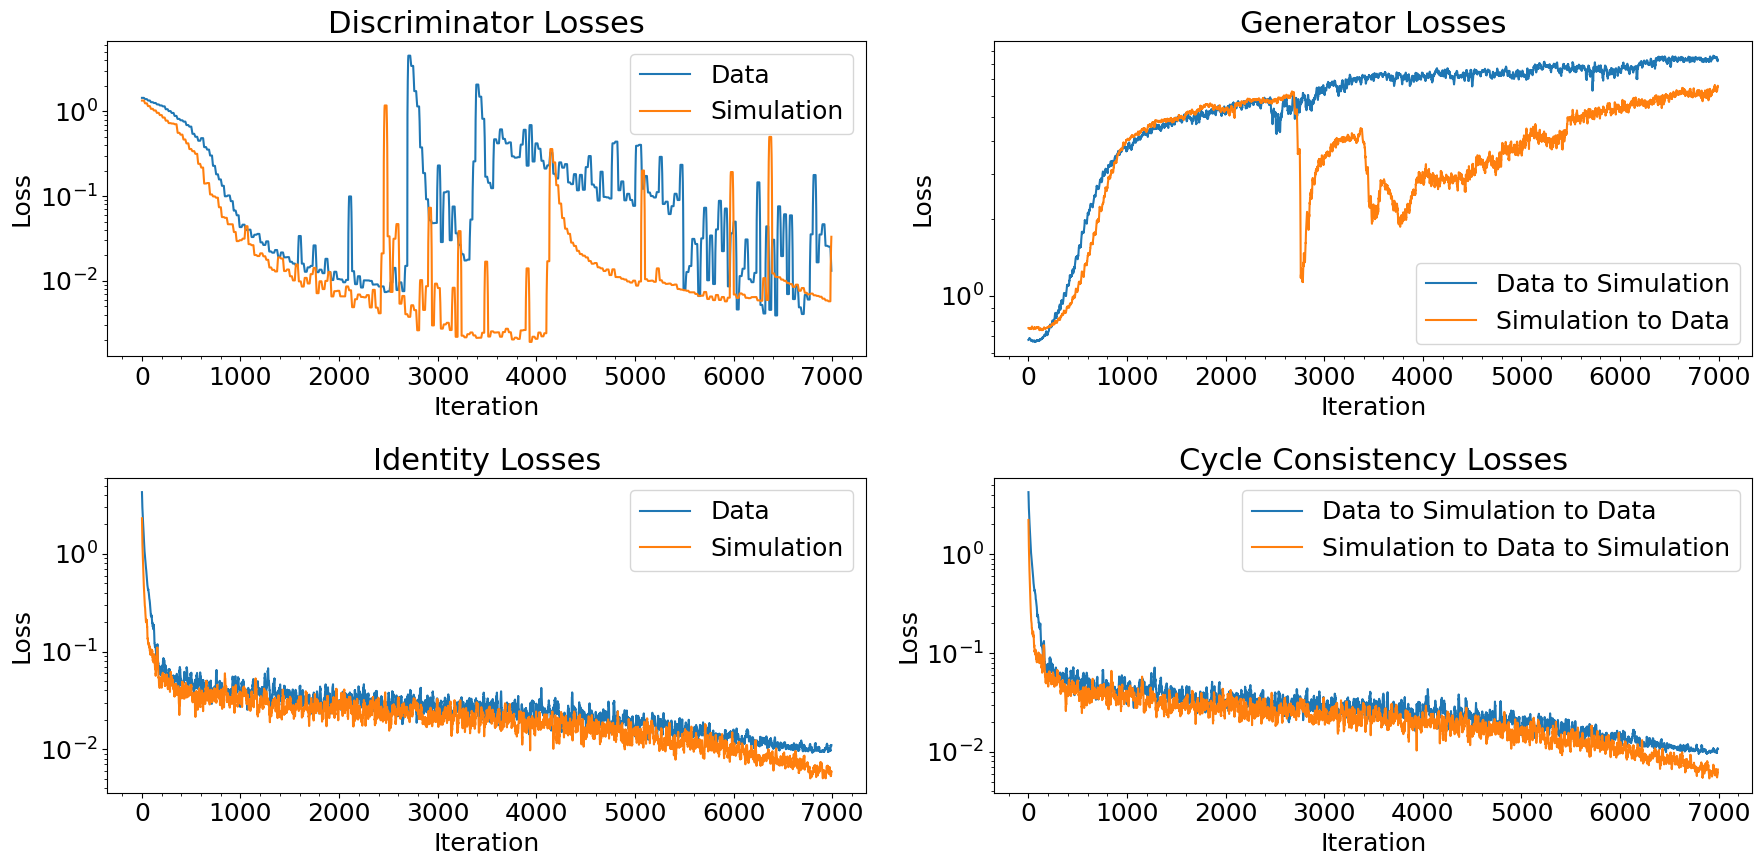

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gan_loss_weight = 9 # weight of the generator loss. ATN(sim) - data
cyc_loss_weight = 20 # weight of the cycle consistent loss in training, eg loss(sim->data->sim)
iden_loss_weight = 5 # weight of idenentity loss, for example ATN(data)- data
home_dir='/nas/longleaf/home/kbhimani/'

import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Load existing losses
losses_G = np.load(f"{home_dir}CPU-Net/plot_data/losses_G.npy")
losses_D_A = np.load(f"{home_dir}CPU-Net/plot_data/losses_D_A.npy")
losses_D_B = np.load(f"{home_dir}CPU-Net/plot_data/losses_D_B.npy")
losses_GAN_A2B = np.load(f"{home_dir}CPU-Net/plot_data/losses_GAN_A2B.npy")
losses_GAN_B2A = np.load(f"{home_dir}CPU-Net/plot_data/losses_GAN_B2A.npy")
losses_identity_A = np.load(f"{home_dir}CPU-Net/plot_data/losses_identity_A.npy")
losses_identity_B = np.load(f"{home_dir}CPU-Net/plot_data/losses_identity_B.npy")
losses_cycle_ABA = np.load(f"{home_dir}CPU-Net/plot_data/losses_cycle_ABA.npy")
losses_cycle_BAB = np.load(f"{home_dir}CPU-Net/plot_data/losses_cycle_BAB.npy")
# Set the moving average window
win = 10

# Create a figure with a grid of 2x3 subplots to include the new loss plots
plt.figure(figsize=(18, 9))
iterations = np.linspace(1,len(losses_G)-win+1,len(losses_G)-win+1)
plt.rcParams['font.size'] = 18
# plt.rcParams["figure.figsize"] = (9, 8)
cut = (iterations>0)

# Discriminator Losses
plt.subplot(2, 2, 1)
plt.plot(iterations[cut], moving_average(losses_D_A, win)[cut], label='Data')
plt.plot(iterations[cut], moving_average(losses_D_B, win)[cut], label='Simulation')
plt.title('Discriminator Losses', fontsize=22)
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.yscale('log')
plt.minorticks_on()
plt.legend()

# Generator Losses
plt.subplot(2, 2, 2)
plt.plot(iterations[cut], moving_average(losses_GAN_A2B/gan_loss_weight, win)[cut], label='Data to Simulation')
plt.plot(iterations[cut], moving_average(losses_GAN_B2A/gan_loss_weight, win)[cut], label='Simulation to Data')
plt.title('Generator Losses', fontsize=22)
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.yscale('log')
plt.minorticks_on()
plt.legend()

# Identity Losses
plt.subplot(2, 2, 3)
plt.plot(iterations, moving_average(losses_identity_A/iden_loss_weight, win), label='Data')
plt.plot(iterations, moving_average(losses_identity_B/iden_loss_weight, win), label='Simulation')
plt.title('Identity Losses', fontsize=22)
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.yscale('log')
plt.minorticks_on()
plt.legend()

# Cycle Consistency Losses
plt.subplot(2, 2, 4)
plt.plot(iterations, moving_average(losses_cycle_ABA/cyc_loss_weight, win), label='Data to Simulation to Data')
plt.plot(iterations, moving_average(losses_cycle_BAB/cyc_loss_weight, win), label='Simulation to Data to Simulation')
plt.title('Cycle Consistency Losses', fontsize=22)
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.yscale('log')
plt.minorticks_on()
plt.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('figs/loss_funcs.pdf')


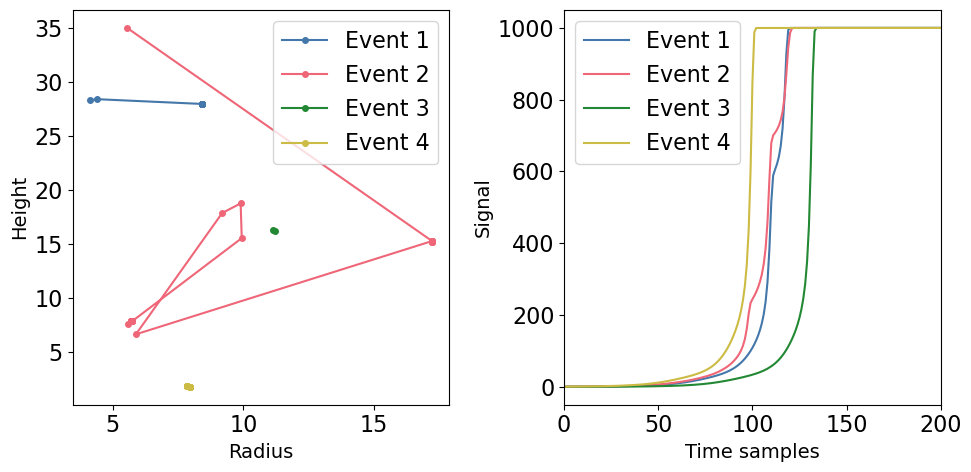

In [7]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Load saved plot data
plot_data_file = "/nas/longleaf/home/kbhimani/ornl_sims/plot_data.json"

with open(plot_data_file, "r") as f:
    plot_data = json.load(f)

# Prepare plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Two plots: hits and pulses

# Define colors for consistency
colors = [
    "#4477AA",  # Blue
    "#EE6677",  # Red
    "#228833",  # Green
    "#CCBB44",  # Yellow
    "#66CCEE",  # Sky Blue
    'tab:orange'
]

# Plot the data
for event_idx, event_label in enumerate(plot_data["events"]):
    # Plot hit locations
    event_hits = np.array([[hit['x_hit'], hit['y_hit']] for hit in plot_data["hits"][event_idx]])
    axes[0].plot(
        np.abs(event_hits[:, 0]),
        np.abs(event_hits[:, 1]),
        marker='o',
        markersize=4,
        # alpha=0.7,
        label=event_label,
        color=colors[event_idx]
    )
    
    # Plot waveforms
    average_waveform = np.array(plot_data["waveforms"][event_idx])
    axes[1].plot(
        average_waveform,
        label=event_label,
        color=colors[event_idx]
    )

# Finalize hit location plot
# axes[0].set_title("Particle Path and Hit Locations")
axes[0].set_xlabel("Radius", fontsize=14)
axes[0].set_ylabel("Height", fontsize=14)
axes[0].legend()

# Finalize waveform plot
# axes[1].set_title("Simulated Pulses", fontsize=14)
axes[1].set_xlabel("Time samples", fontsize=14)
axes[1].set_ylabel("Signal", fontsize=14)
axes[1].set_xlim(0, 200)  # Match the original x-axis limit
axes[1].legend()

# Adjust layout and save the recreated plots
plt.tight_layout()
plt.savefig('figs/hits_and_pulses.pdf', dpi=100)
plt.show()


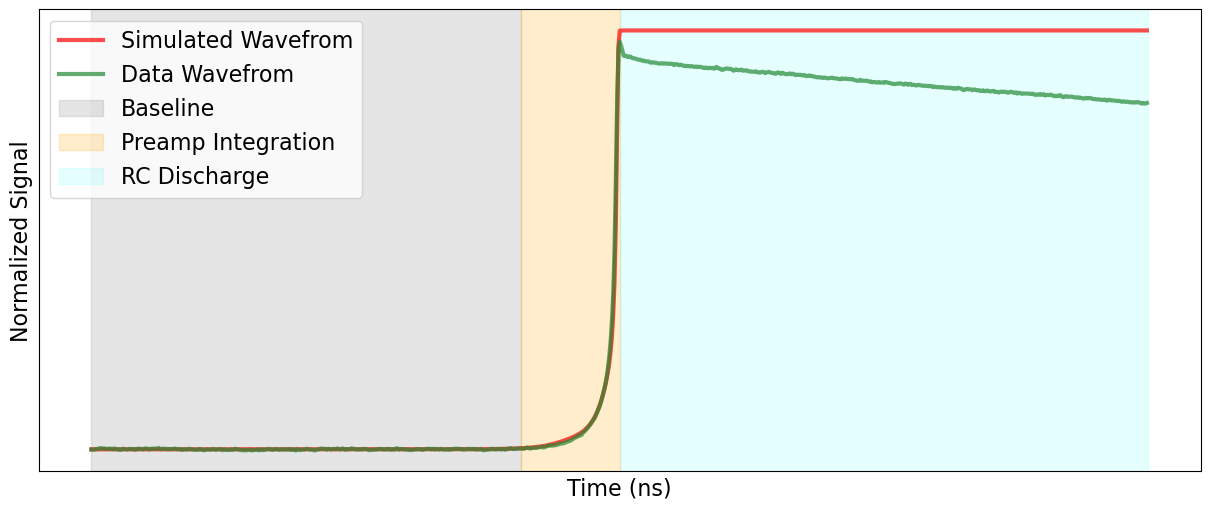

In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt

xlim=200*16
xmax=550*16
# Clear the current session and reload the saved data to verify
loaded_data = np.load("/nas/longleaf/home/kbhimani/CPU-Net/plot_data/waveform_data.npy", allow_pickle=True).item()
# Accessing the data
loaded_detector_pulse = loaded_data["detector_pulse"]
loaded_simulated_pulse = loaded_data["simulated_pulse"]
loaded_translated_pulse = loaded_data["translated_pulse"]
loaded_translated_pulse_inv = loaded_data["translated_pulse_inv"]

num_samples = len(loaded_detector_pulse)

# Create a new array for time, assuming samples are spaced 16 ns apart
time_array = np.arange(0, num_samples * 16, 16)  # Time in nanoseconds



# Plot to verify the loaded data
fig = plt.figure(figsize=(15, 6))
plt.plot(time_array, loaded_simulated_pulse, label="Simulated Wavefrom", alpha=0.7, color="red", linewidth=3)
plt.plot(time_array, loaded_detector_pulse, label="Data Wavefrom", alpha=0.7, color="#228833", linewidth=3) #, linestyle=":"
# plt.plot(loaded_translated_pulse, label="ATN Output",color="dodgerblue", linewidth = 2)

plt.axvspan(xmin=0*16, xmax=325*16, alpha=0.2, color="grey", label="Baseline")
plt.axvspan(xmin=325*16, xmax=400*16, alpha=0.2, color="orange", label="Preamp Integration")
plt.axvspan(xmin=400*16, xmax=800*16, alpha=0.1, color="cyan", label="RC Discharge")
plt.xticks([], [])
plt.yticks([], [])
# plt.xlim(xlim,xmax)
plt.xlabel("Time (ns)")
plt.ylabel("Normalized Signal")
plt.legend(loc="upper left")
plt.savefig("figs/wf_comp_sim_data.pdf", dpi=300)
plt.show()


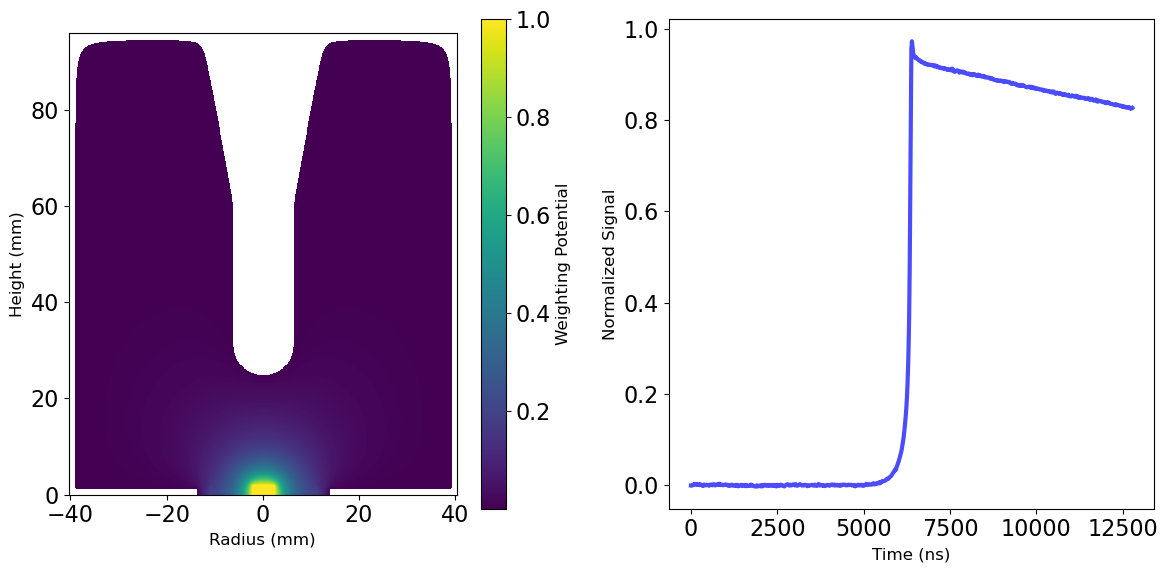

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.interpolate as interp

det='V06649A'
# Load data
field_dir = f'/nas/longleaf/home/kbhimani/ornl_sims/icpc_siggen/fields/wp_{det}.dat'
# field_dir= '/work/users/k/b/kbhimani/siggen_ccd_data/wp/wp_P00698A_sc0.00_grid0.0200.dat'
data = np.loadtxt(field_dir)

# Extract and sort unique x, y values to ensure correct reshaping
x = np.sort(np.unique(data[:, 0]))
y = np.sort(np.unique(data[:, 1]))
z = data[:, 2]  # Column 3 = field, Column 2 = potential

# Reshape z into a grid
zvals = z.reshape(len(x), len(y)).T  # Transpose to match x-y ordering

# Set very small values to NaN to prevent issues in LogNorm
zvals[zvals < 1e-6] = np.nan  # Ensures near-zero values don't appear in log scale

# Create a symmetric full detector image (mirroring negative radial values)
zvals_neg = np.fliplr(zvals)
zvals_full = np.hstack((zvals_neg, zvals))

# Define plot boundaries
bounds = (-1 * max(x), max(x), min(y), max(y))

# Create subplots: one for the weighting potential, one for the detector pulse
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

### **Left Plot: Weighting Potential Heatmap**
ax1 = axes[0]
im = ax1.imshow(zvals_full, 
                vmin=1e-5, vmax=np.nanmax(zvals),  # Ensures 0 is white
                extent=bounds, 
                origin="lower", 
                cmap='viridis',  # Colorblind-friendly colormap
                interpolation='bilinear')

# Labels and colorbar
ax1.set_xlabel("Radius (mm)", size=12)
ax1.set_ylabel("Height (mm)", size=12)
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label("Weighting Potential", size=12)
# ax1.set_title("Weighting Potential", size=14)

### **Right Plot: Detector Pulse**
ax2 = axes[1]
ax2.plot(time_array, loaded_detector_pulse, alpha=0.7, color="blue", linewidth=3)

# Labels and legend
ax2.set_xlabel("Time (ns)", size=12)
ax2.set_ylabel("Normalized Signal", size=12)
# ax2.set_title("Detector Pulse", size=14)

# Save figure
plt.tight_layout()
plt.savefig('figs/wp_det.pdf', dpi=200)
plt.show()

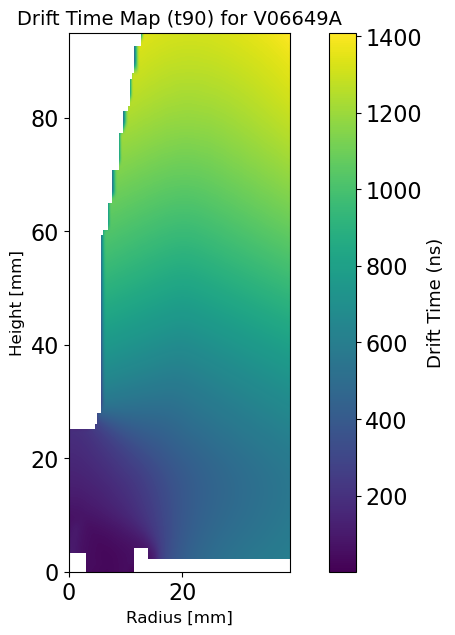

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

# Load drift time data
file_path = "/nas/longleaf/home/kbhimani/ornl_sims/icpc_siggen/V06649A_dt.txt"  # Update if needed
data = np.loadtxt(file_path, comments="#")  # Skip header lines

# Extract r, z, and drift time values
r_values = data[:, 0]  # Radial positions
z_values = data[:, 1]  # Axial positions
drift_times = data[:, 2]  # Drift time (t90)

mask = drift_times < 8800
filtered_data = data[mask]

# Extract filtered r, z, and drift time values
r_filtered = filtered_data[:, 0]  # Filtered radial positions
z_filtered = filtered_data[:, 1]  # Filtered axial positions
drift_times_filtered = filtered_data[:, 2]  # Filtered drift time values

# Create a structured grid for interpolation
r_lin = np.linspace(min(r_filtered), max(r_filtered), 100)  # 100 points in radial direction
z_lin = np.linspace(min(z_filtered), max(z_filtered), 100)  # 100 points in axial direction
R_grid, Z_grid = np.meshgrid(r_lin, z_lin)

# Interpolate drift times to create a uniform grid
drift_time_grid = interp.griddata((r_filtered, z_filtered), drift_times_filtered,
                                  (R_grid, Z_grid), method='linear')

# **Set drift times = 0 to NaN (so they appear white)**
drift_time_grid[drift_time_grid == 0] = np.nan

# Define plot boundaries
extent = [min(r_filtered), max(r_filtered), min(z_filtered), max(z_filtered)]

# Create the drift time heatmap
fig, ax = plt.subplots(figsize=(10, 7))

# Set NaN values to white in the colormap
cmap = plt.cm.viridis.copy()
cmap.set_bad("white")  # Make NaN (t90 = 0) appear white

im = ax.imshow(drift_time_grid, 
               vmin=1, vmax=np.nanmax(drift_times_filtered),  # Start from 1 to avoid white overwriting valid values
               extent=extent, 
               origin="lower", 
               cmap=cmap,  # Use modified colormap
               interpolation='bicubic')

# Labels and colorbar
ax.set_xlabel("Radius [mm]", size=12)
ax.set_ylabel("Height [mm]", size=12)
ax.set_title("Drift Time Map (t90) for V06649A", size=14)

cbar = plt.colorbar(im)
cbar.set_label("Drift Time (ns)", size=13)

# Show the plot
plt.show()


Loading saved waveform data from /nas/longleaf/home/kbhimani/CPU-Net/figs/sep_waveform_data.npz...
Saved reloaded plot to figs/sep_result_comp_1x3_cycle_BAB.pdf


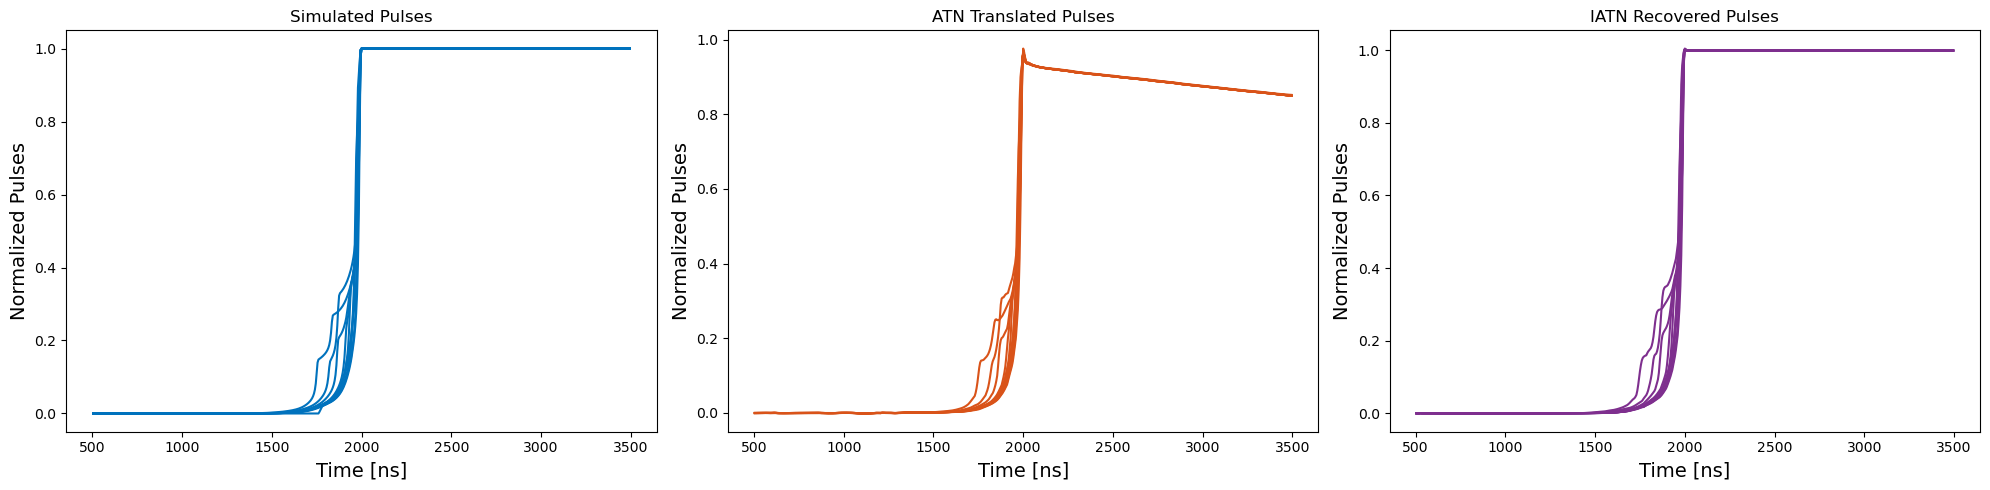

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
def replot_saved_waveforms(eng_peak="eng_peak"):
    save_path = f"/nas/longleaf/home/kbhimani/CPU-Net/figs/{eng_peak}_waveform_data.npz"
    
    if not os.path.exists(save_path):
        print("No saved waveform data found. Please run the simulation first.")
        return
    
    print(f"Loading saved waveform data from {save_path}...")
    data = np.load(save_path, allow_pickle=True)
    
    real_Bs = list(data["real_Bs"])
    fake_As = list(data["fake_As"])
    recovered_Bs = list(data["recovered_Bs"])
    time = data["time"]

    colors = {
        "real_B": "#0072BD",  
        "fake_A": "#D95319",  
        "recovered_B": "#7E2F8E",
    }

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))  
    titles = ["Simulated Pulses", "ATN Translated Pulses", "IATN Recovered Pulses"]
    waveform_lists = [real_Bs, fake_As, recovered_Bs]
    color_keys = ["real_B", "fake_A", "recovered_B"]
    
    cut = (time > 100) & (time < 700)

    for ax, title, waveforms, color_key in zip(axs, titles, waveform_lists, color_keys):
        for i in range(len(real_Bs)):  # Using saved sample count
            ax.plot(time[cut]*5, waveforms[i][cut], color=colors[color_key], label=title if i == 0 else "")
        ax.set_title(title)
        ax.set_xlabel('Time [ns]', fontsize=14)
        ax.set_ylabel('Normalized Pulses', fontsize=14)

    fig.tight_layout()
    pdf_path = f"figs/{eng_peak}_result_comp_1x3_cycle_BAB.pdf"
    plt.savefig(pdf_path)
    print(f"Saved reloaded plot to {pdf_path}")
    plt.show()
replot_saved_waveforms(eng_peak="sep")

Loading saved waveform data from /nas/longleaf/home/kbhimani/CPU-Net/figs/sep_waveform_data_ABA.npz...
Saved reloaded plot to figs/sep_result_comp_1x3_cycle_ABA.pdf


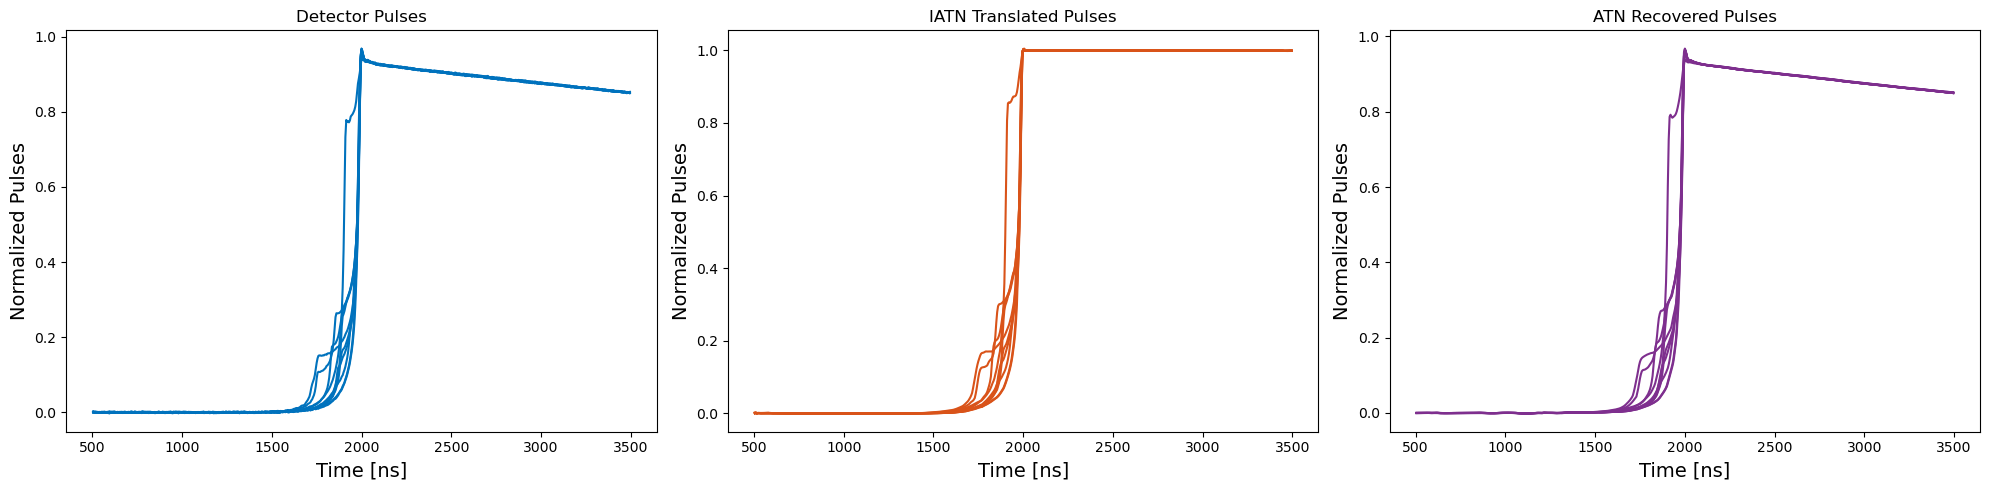

In [11]:
def replot_saved_waveforms_ABA(eng_peak="eng_peak"):
    save_path = f"/nas/longleaf/home/kbhimani/CPU-Net/figs/{eng_peak}_waveform_data_ABA.npz"
    
    if not os.path.exists(save_path):
        print("No saved waveform data found. Please run the simulation first.")
        return
    
    print(f"Loading saved waveform data from {save_path}...")
    data = np.load(save_path, allow_pickle=True)
    
    real_As = list(data["real_As"])
    fake_Bs = list(data["fake_Bs"])
    recovered_As = list(data["recovered_As"])
    time = data["time"]

    colors = {
        "real_A": "#0072BD",  
        "fake_B": "#D95319",  
        "recovered_A": "#7E2F8E",
    }

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))  
    titles = ["Detector Pulses", "IATN Translated Pulses", "ATN Recovered Pulses"]
    waveform_lists = [real_As, fake_Bs, recovered_As]
    color_keys = ["real_A", "fake_B", "recovered_A"]
    
    cut = (time > 100) & (time < 700)

    for ax, title, waveforms, color_key in zip(axs, titles, waveform_lists, color_keys):
        for i in range(len(real_As)):  # Using saved sample count
            ax.plot(time[cut]*5, waveforms[i][cut], color=colors[color_key], label=title if i == 0 else "")
        ax.set_title(title)
        ax.set_xlabel('Time [ns]', fontsize=14)
        ax.set_ylabel('Normalized Pulses', fontsize=14)

    fig.tight_layout()
    pdf_path = f"figs/{eng_peak}_result_comp_1x3_cycle_ABA.pdf"
    plt.savefig(pdf_path)
    print(f"Saved reloaded plot to {pdf_path}")
    plt.show()
replot_saved_waveforms_ABA(eng_peak="sep")